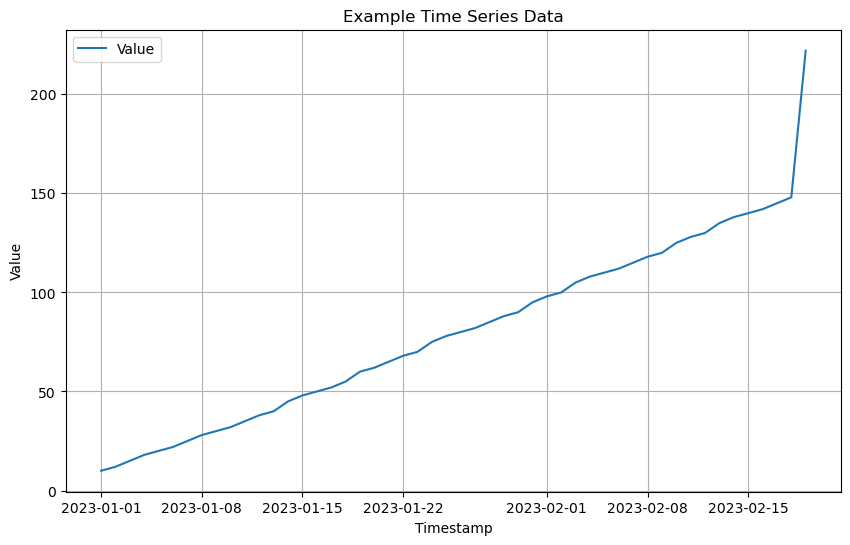

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Time series data consists of a series of data points collected at regular intervals (e.g., daily, monthly, hourly). 
# -> Each data point is associated with a timestamp that indicates when the observation was recorded. 
# -> The order of the data points matters, as they are arranged chronologically.

# 1.Trend: The long-term movement of the data over time. It captures the overall direction in which the data is moving. 
#     Trends can be increasing, decreasing, or relatively constant.

# 2.Seasonality: The repeating patterns or fluctuations in the data that occur at regular intervals. 
#     Seasonality might be daily, weekly, monthly, or yearly, depending on the context.

# 3.Noise: Random variations or irregularities in the data that are not part of the trend or seasonality. 
#     Noise can be caused by factors that are difficult to model or predict.

import pandas as pd
import matplotlib.pyplot as plt

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=50, freq='D')
values = [10, 12, 15, 18, 20, 22, 25, 28, 30, 32,
          35, 38, 40, 45, 48, 50, 52, 55, 60, 62,
          65, 68, 70, 75, 78, 80, 82, 85, 88, 90,
          95, 98, 100, 105, 108, 110, 112, 115, 118,
          120, 125, 128, 130, 135, 138, 140, 142, 145, 148,222]

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Example Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# 1. Handling Missing Data:
# Missing data is a common issue in time series data. You might encounter gaps where data points are not 
# recorded for certain timestamps. There are various techniques to handle missing data, including interpolation, 
# forward filling, and backward filling.
import pandas as pd
# Create a DataFrame with missing values
data = {'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'value': [10, 12, None, 18, 20, None, 25, 28, 30, None]}
df = pd.DataFrame(data)
# Fill missing values with forward fill
df['value'].fillna(method='ffill', inplace=True)
print(df)

   timestamp  value
0 2023-01-01   10.0
1 2023-01-02   12.0
2 2023-01-03   12.0
3 2023-01-04   18.0
4 2023-01-05   20.0
5 2023-01-06   20.0
6 2023-01-07   25.0
7 2023-01-08   28.0
8 2023-01-09   30.0
9 2023-01-10   30.0


In [4]:
# 2. Dealing with Outliers:
# Outliers are extreme values that deviate significantly from the rest of the data. 
# They can impact the accuracy of analysis and predictions. You may choose to remove outliers or 
# apply transformations to make them less influential.

from scipy import stats
# Consider the same dataset from the previous example. If you suspect outliers,
# you can use statistical techniques to identify and handle them, such as Z-score or modified Z-score methods.
z_scores = stats.zscore(df['value'])
df['value'] = df['value'][(z_scores < 3)]

print(df)

   timestamp  value
0 2023-01-01   10.0
1 2023-01-02   12.0
2 2023-01-03   12.0
3 2023-01-04   18.0
4 2023-01-05   20.0
5 2023-01-06   20.0
6 2023-01-07   25.0
7 2023-01-08   28.0
8 2023-01-09   30.0
9 2023-01-10   30.0


In [5]:
# 3. Resampling:
# Resampling involves changing the frequency of your time series data.
# You might upsample to increase the frequency or downsample to decrease it.
# This can be useful when your data has irregular intervals.

# Practical Example:
# Let's say you have daily data, but you want to analyze it on a monthly basis. You can resample the data using pandas:

df_resampled = df.resample('M', on='timestamp').sum()

print(df_resampled)

            value
timestamp        
2023-01-31  205.0


In [6]:
# 4. Handling Time Zones and Irregular Intervals:
# Ensuring that your data is consistently timestamped and aligned is important for accurate analysis. 
# This step involves handling time zone differences and ensuring that the intervals between timestamps are consistent.

# Practical Example:
# If your data has time zone information and you need to convert it to a specific time zone, you can use pandas

df1 = df.copy()
df1.set_index('timestamp', inplace=True)

# Convert time zones and print
df1.index = df1.index.tz_localize('US/Pacific').tz_convert('Asia/Kolkata')

print(df1)

                           value
timestamp                       
2023-01-01 13:30:00+05:30   10.0
2023-01-02 13:30:00+05:30   12.0
2023-01-03 13:30:00+05:30   12.0
2023-01-04 13:30:00+05:30   18.0
2023-01-05 13:30:00+05:30   20.0
2023-01-06 13:30:00+05:30   20.0
2023-01-07 13:30:00+05:30   25.0
2023-01-08 13:30:00+05:30   28.0
2023-01-09 13:30:00+05:30   30.0
2023-01-10 13:30:00+05:30   30.0


# Visualization

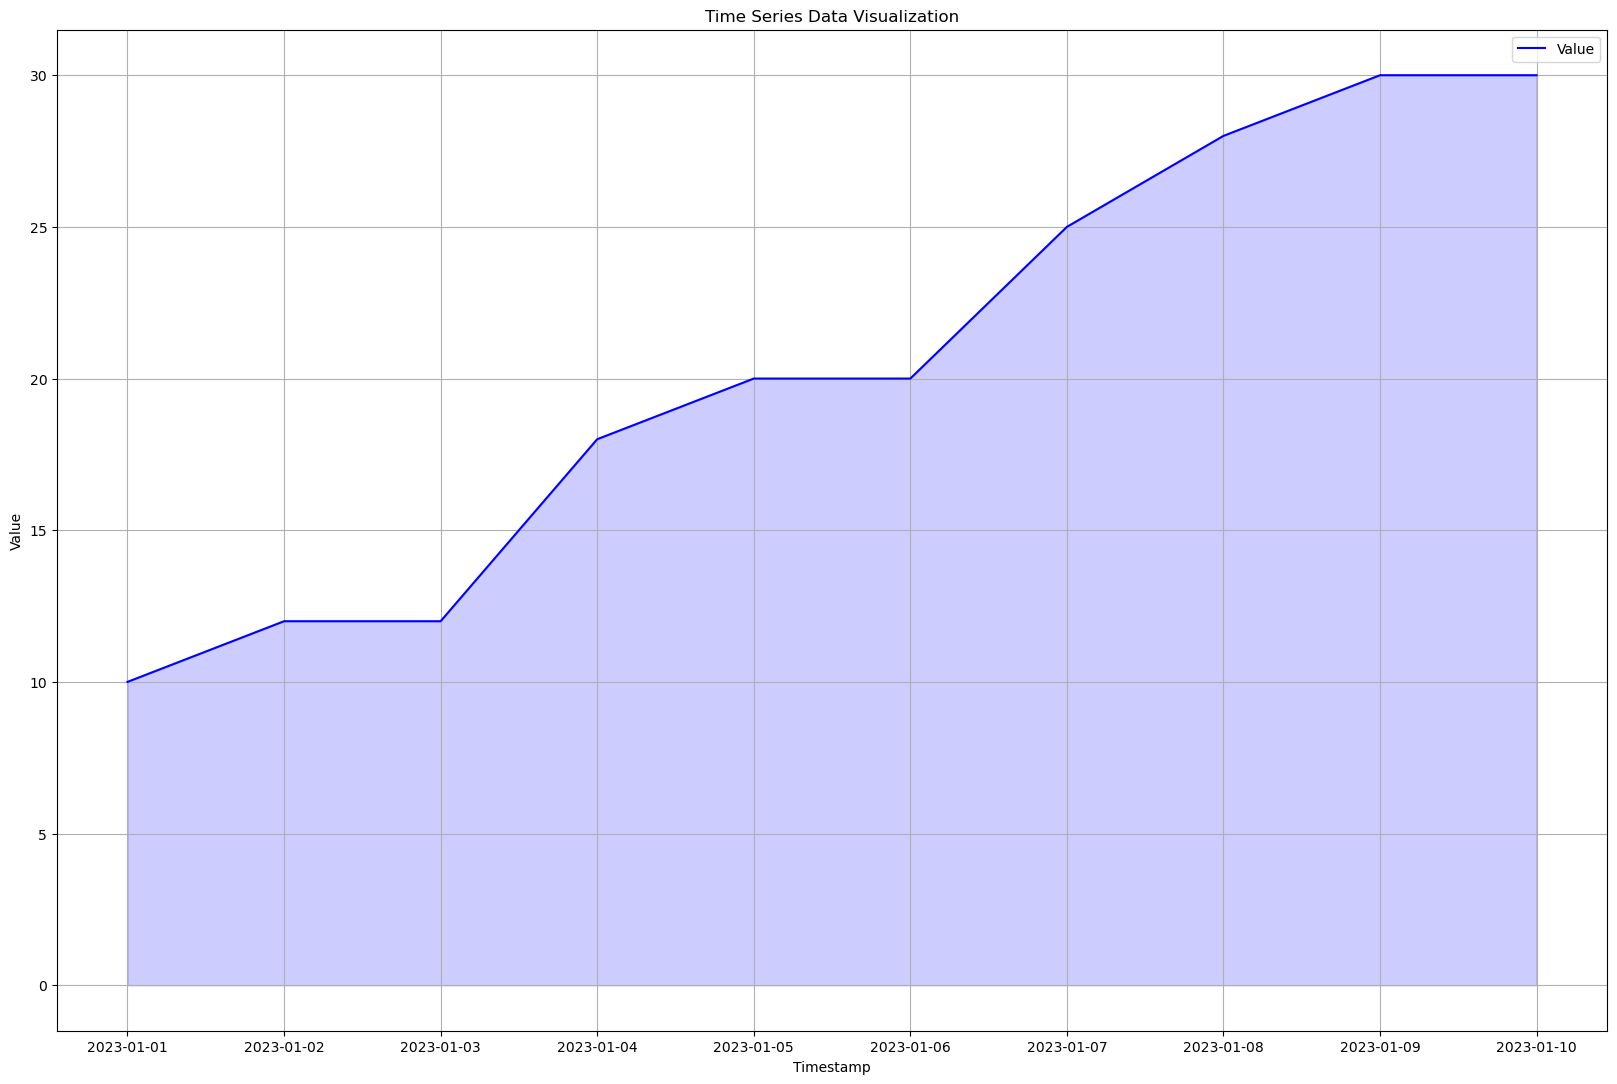

In [7]:
# 1. Line Plots and Area Plots:
# Line plots are simple and effective ways to visualize raw time series data. They help you observe trends, 
# fluctuations, and patterns over time. Area plots are similar to line plots but filled in with color, making 
# it easier to visualize the cumulative effect of values.

# Practical Example:
# Let's visualize a simple time series dataset using line plots and an area plot:
# Plot the time series data using line and area plots
plt.figure(figsize=(20,13 ))
plt.plot(df['timestamp'], df['value'], label='Value', color='blue')
plt.fill_between(df['timestamp'], df['value'], color='blue', alpha=0.2)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

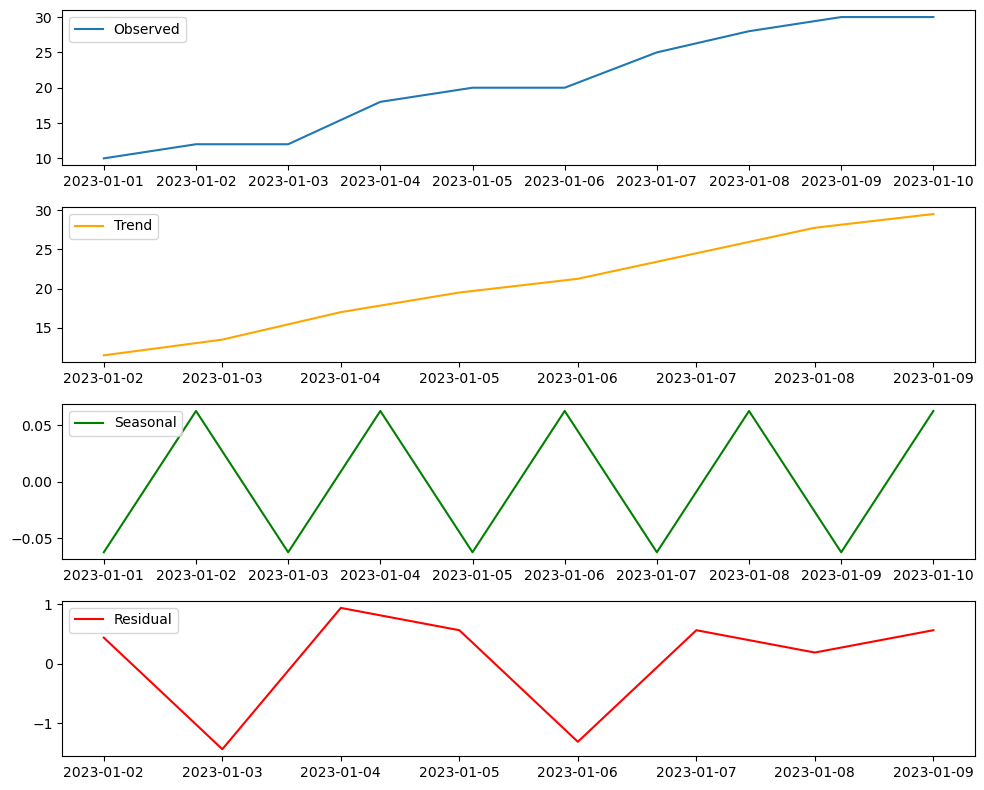

In [9]:
# 2. Seasonal Decomposition:
# Seasonal decomposition is used to separate a time series into its underlying components: 
# trend, seasonality, and residual (noise). 
# This helps in understanding the various patterns within the data.


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition with smaller period
result = seasonal_decompose(df['value'], model='additive', period=2)

# Plot the decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['timestamp'], result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df['timestamp'], result.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df['timestamp'], result.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df['timestamp'], result.resid, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# Example of lagged values
# Create lagged values (for lag = 1)
df['lag_1'] = df['value'].shift(1)

print(df[['timestamp','lag_1']])


    timestamp  lag_1
0  2023-01-01    NaN
1  2023-01-02   10.0
2  2023-01-03   10.5
3  2023-01-04   11.0
4  2023-01-05   11.5
..        ...    ...
95 2023-04-06   57.0
96 2023-04-07   57.5
97 2023-04-08   58.0
98 2023-04-09   58.5
99 2023-04-10   59.0

[100 rows x 2 columns]


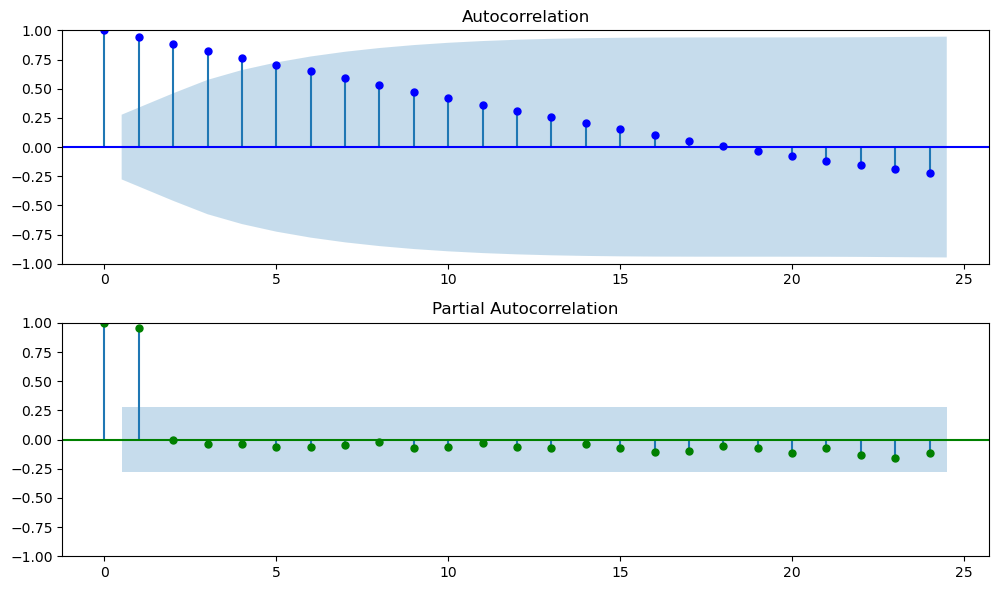

In [18]:

# 3. Autocorrelation and Partial Autocorrelation (ACF and PACF):

# Autocorrelation Function (ACF): Measures the correlation between a data point and its
# lagged values at different time intervals.

# Partial Autocorrelation Function (PACF): Measures the direct correlation between a data point and 
# its lagged values,
# removing the influence of intervening lags.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=50, freq='D')
values = [10, 12, 15, 18, 20, 22, 25, 28, 30, 32,
          35, 38, 40, 45, 48, 50, 52, 55, 60, 62,
          65, 68, 70, 75, 78, 80, 82, 85, 88, 90,
          95, 98, 100, 105, 108, 110, 112, 115, 118,
          120, 125, 128, 130, 135, 138, 140, 142, 145, 148,155]

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Plot autocorrelation and partial autocorrelation plots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(df['value'], lags=24 ,ax=axes[0], color='blue')
plot_pacf(df['value'], lags=24,ax=axes[1], color='green')

plt.tight_layout()
plt.show()


# Decomposition

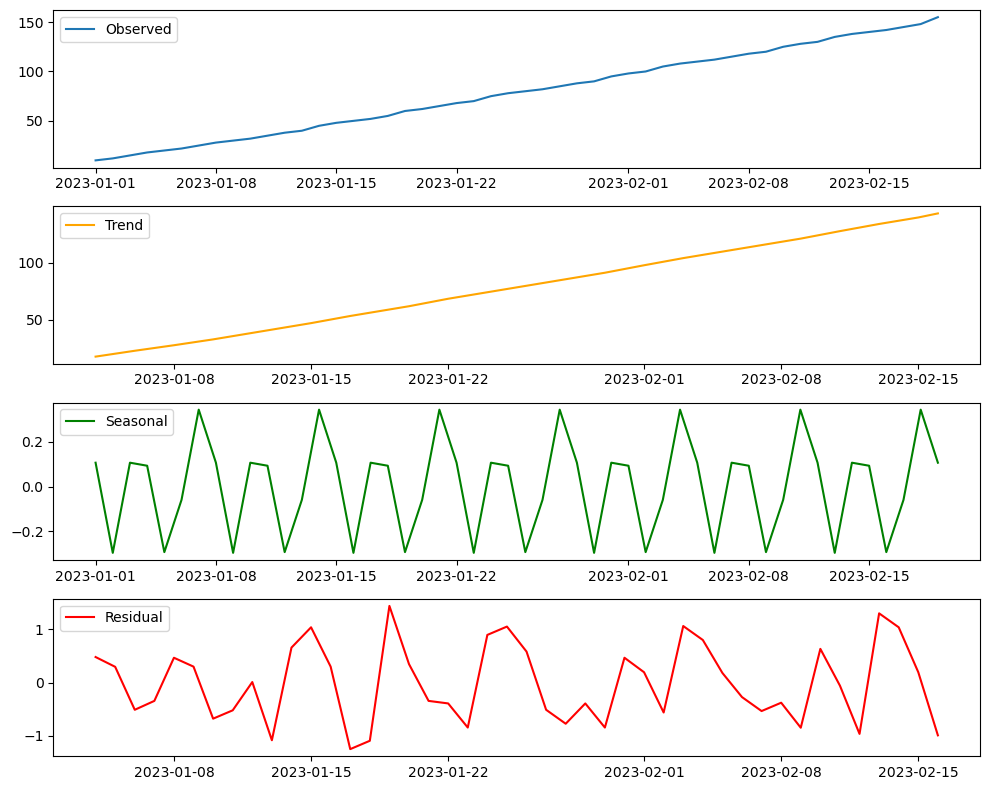

In [23]:
# Time series decomposition is a technique used to break down a time series dataset into 
# its underlying components, which typically include trend, seasonality, and residual components. 
# This decomposition helps in understanding the underlying patterns and characteristics of the data, 
# making it easier to analyze and model.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['value'], model='additive', period=7)  # Assuming a weekly seasonality

# Plot the decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['timestamp'], result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df['timestamp'], result.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df['timestamp'], result.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df['timestamp'], result.resid, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


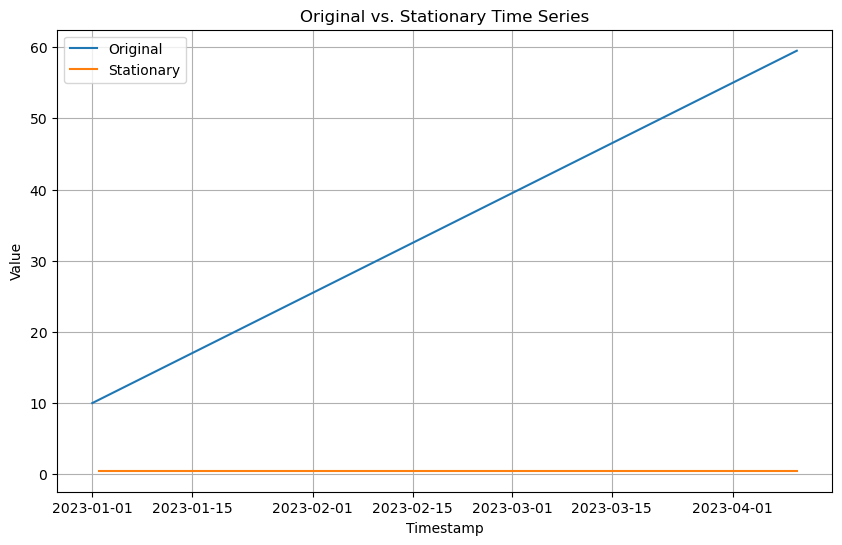

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Apply differencing to make the time series stationary
df['stationary_value'] = df['value'].diff()

# Plot the original and differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Original')
plt.plot(df['timestamp'], df['stationary_value'], label='Stationary')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original vs. Stationary Time Series')
plt.legend()
plt.grid(True)
plt.show()


Models


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


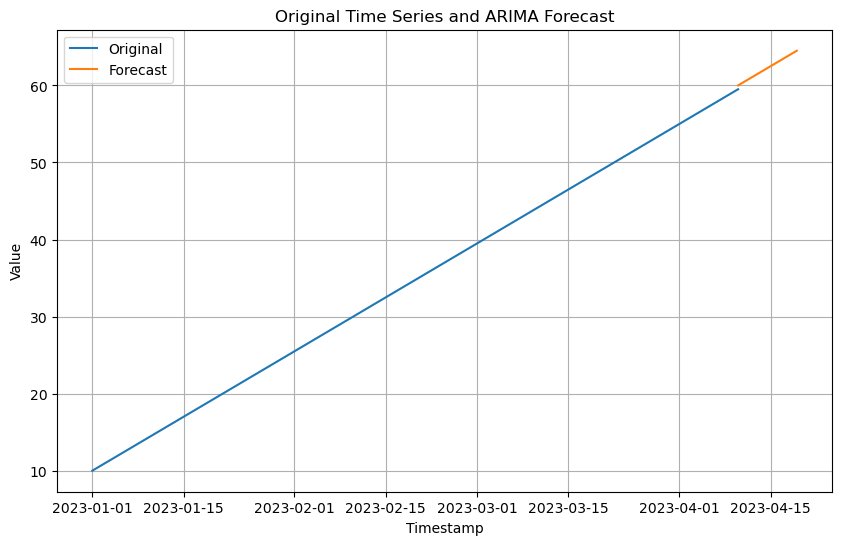

In [28]:
# 5. Time Series Forecasting: --------------


# ARIMA (AutoRegressive Integrated Moving Average) models capture the relationship between current and 
# past observations and their differences. ARIMA is defined by three components: autoregressive (AR), 
# differencing (I), and moving average (MA).

# Practical Example:
# Using the differenced stationary time series from the previous example,
# let's fit an ARIMA model and make forecasts:


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Fit ARIMA model
model = ARIMA(df['value'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original, and forecasted time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Original')
plt.plot(pd.date_range(start='2023-04-10', periods=forecast_steps, freq='D'), forecast, label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Time Series and ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.01772D+00    |proj g|=  3.43760D+04


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     52      2     0     0   1.557D+04  -9.256D+00
  F =  -9.2559888839096374     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


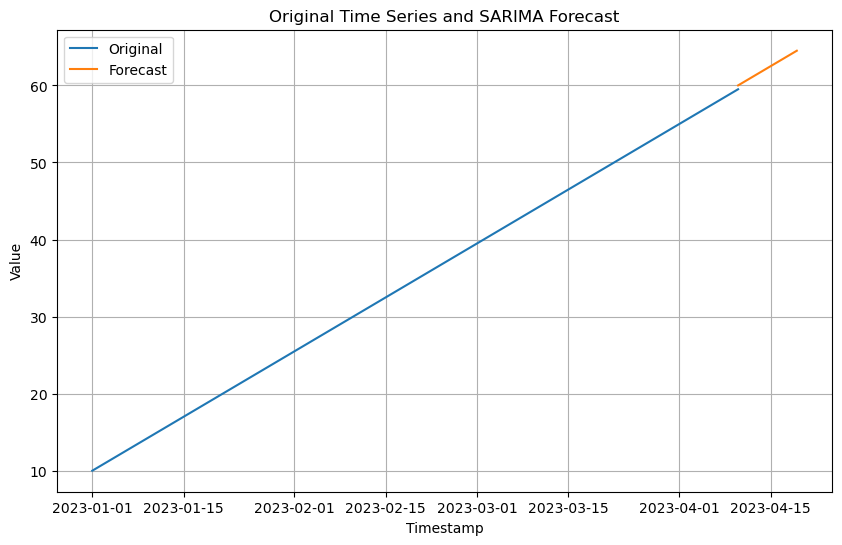

In [29]:
# 2. SARIMA (Seasonal ARIMA):
# SARIMA stands for Seasonal AutoRegressive Integrated Moving Average. It's an extension of the ARIMA model 
# that includes seasonal components. SARIMA models are capable of handling both trend and seasonality in 
# time series data.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Fit SARIMA model
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Assuming weekly seasonality
model_fit = model.fit()

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original, and forecasted time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Original')
plt.plot(pd.date_range(start='2023-04-10', periods=forecast_steps, freq='D'), forecast, label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Time Series and SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


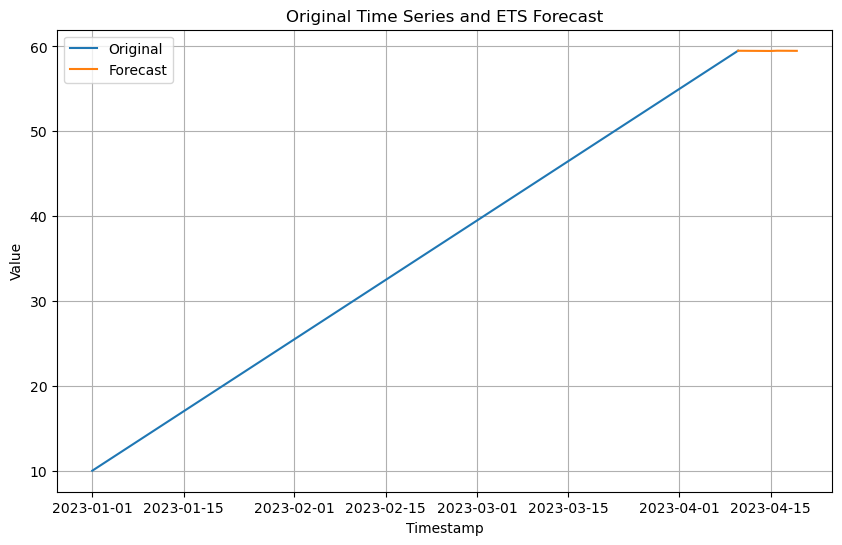

In [30]:
# 2. ETS (Exponential Smoothing):
# ETS, or Exponential Smoothing, is a class of forecasting methods that assigns exponentially 
# decreasing weights to past observations. 
# ETS models are flexible and can handle various types of seasonality and trend patterns.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Fit ETS model
model = ExponentialSmoothing(df['value'], seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original, and forecasted time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Original')
plt.plot(pd.date_range(start='2023-04-10', periods=forecast_steps, freq='D'), forecast, label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Time Series and ETS Forecast')
plt.legend()
plt.grid(True)
plt.show()


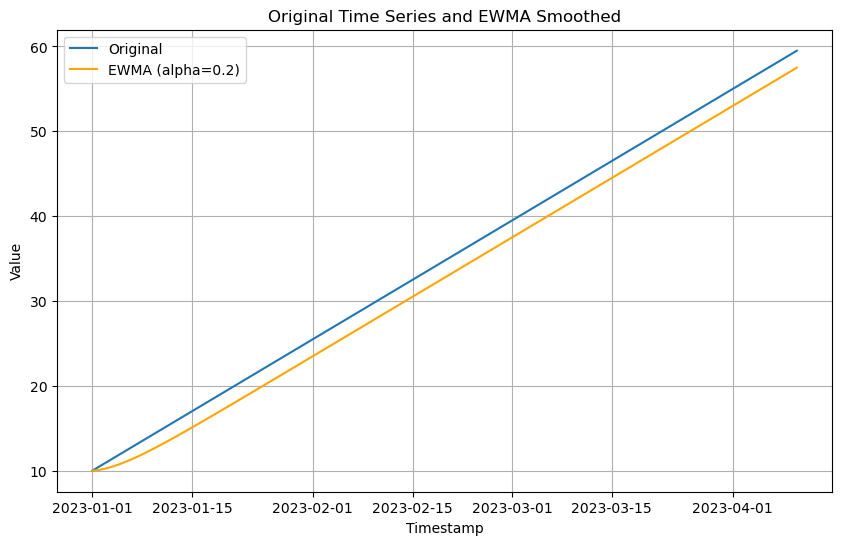

In [31]:
# 3. EWMA (Exponential Weighted Moving Average):
# Explanation:
# EWMA, or Exponential Weighted Moving Average, is a simple forecasting method that assigns
# exponentially decreasing weights to past observations. It's useful for smoothing out noisy time 
# series data and capturing trends.

import pandas as pd
import matplotlib.pyplot as plt

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'value': values})

# Calculate EWMA
alpha = 0.2  # Smoothing factor
df['ewma'] = df['value'].ewm(alpha=alpha, adjust=False).mean()

# Plot original and EWMA-smoothed time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Original')
plt.plot(df['timestamp'], df['ewma'], label=f'EWMA (alpha={alpha})', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Time Series and EWMA Smoothed')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# fb probhet 

from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Generate timestamps and values
timestamps = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10 + i*0.5 for i in range(100)]  # Non-stationary data with increasing trend

# Create a DataFrame
df = pd.DataFrame({'ds': timestamps, 'y': values})

# Initialize and fit Prophet model
model = Prophet()
model.fit(df)

# Create a future DataFrame for forecasting
future = model.make_future_dataframe(periods=10)

# Generate forecasts
forecast = model.predict(future)

# Plot original data and forecast
fig = model.plot(forecast)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Time Series and Prophet Forecast')
plt.show()


In [ ]:
# Evaluation Metrics:
# Mean Absolute Error (MAE):

# Measures the average absolute difference between actual and predicted values.
# Lower values indicate better performance.
# Formula: MAE = (1 / n) * Σ|actual - predicted|
# Mean Squared Error (MSE):

# Measures the average squared difference between actual and predicted values.
# Penalizes larger errors more than MAE.
# Formula: MSE = (1 / n) * Σ(actual - predicted)^2
# Root Mean Squared Error (RMSE):

# Square root of MSE.
# Provides error in the same units as the original data.
# Formula: RMSE = √MSE
# Mean Absolute Percentage Error (MAPE):

# Measures the average percentage difference between actual and predicted values.
# Useful for understanding error relative to the scale of the data.
# Formula: MAPE = (1 / n) * Σ(|(actual - predicted) / actual|) * 100
# SMAPE (Symmetric Mean Absolute Percentage Error):

# Similar to MAPE but symmetric, so it handles zero values and extreme values better.
# Formula: SMAPE = (1 / n) * Σ(|actual - predicted| / (|actual| + |predicted|)) * 100
# Forecast Bias:

# Measures the tendency of the forecasts to be consistently higher or lower than actual values.
# Formula: Forecast Bias = (1 / n) * Σ(actual - predicted)

# -------

# Visualization Techniques:
# Line Plot of Actual vs. Predicted:

# Plot the actual values and predicted values on the same graph.
# Helps visualize the overall performance of the model.
# Residual Plot:

# Plot the residuals (actual - predicted) over time.
# Check for patterns or trends in the residuals, indicating model inadequacies.
# Quantile-Quantile (QQ) Plot:

# Plot the quantiles of the residuals against the quantiles of a normal distribution.
# Helps assess if the residuals follow a normal distribution.
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots:

# Evaluate the correlation between a variable and its lagged values.
# Helps identify suitable lags for ARIMA models.
# Actual vs. Predicted Scatter Plot:

# Scatter plot of actual values against predicted values.
# A diagonal line indicates perfect predictions.
# Cumulative Forecast Error Plot:

# Plot the cumulative forecast error over time.
# Helps assess if the model is systematically over- or under-forecasting.